In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Composition - Static
## Dataset: Supermarket sales

Este dataset possui dados de vendas de um supermercado do Myanmar, dos meses de janeiro, fevereiro e março de 2019.

Fonte: https://www.kaggle.com/aungpyaeap/supermarket-sales

*   Colunas

1. **Invoice id:** número de identificação da fatura do recibo de venda gerado por computador

2. **Branch:** lojas (franquias??) do supermercado (A, B e C).

3. **City:** local dos supermercados

4. **Customer type:** Tipos de clientes, registado como Membros para clientes com cartão de sócio e Normal para sem cartão de sócio.

5. **Gender:** Gênero dos clientes

6. **Product line:** Grupos de categorização de itens gerais - Acessórios eletrônicos, Acessórios de moda, Alimentos e bebidas, Saúde e beleza, Casa e estilo de vida, Esportes e viagens

7. **Unit price:** Preço de cada produto em $

8. **Quantity:** Número de produtos adquiridos pelo cliente

9. **Tax:** Taxa de imposto de 5% para a compra do cliente

10. **Total:** Preço total incluindo impostos

11. **Date:** Data da compra (registro disponível de janeiro de 2019 a março de 2019)

12. **Time:** Hora da compra (10h às 21h)

13. **Payment:** Pagamento usado pelo cliente para a compra (3 métodos disponíveis - Dinheiro, Cartão de Crédito e Ewallet)

14. **COGS:** Custo dos produtos vendidos

15. **Gross margin percentage:** Porcentagem da margem bruta

16. **Gross income:** Renda bruta

17. **Rating:** Classificação de estratificação do cliente em sua experiência geral de compra (em uma escala de 1 a 10)

In [ ]:
#Leitura do Dataset
df_vendas = pd.read_csv("/content/drive/MyDrive/supermarket_sales - Sheet1.csv")
df_vendas

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
#Organizando nome das colunas
colunas = df_vendas.columns.str.lower().str.replace('\s+', '_')
df_vendas.columns = colunas
df_vendas

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
#Formatação data
df_vendas['date'] = pd.to_datetime(df_vendas['date'])
print(df_vendas['date'].dt.month.unique())
print(df_vendas['date'].dt.year.unique())

[1 3 2]
[2019]


# Porcentagem de vendas para cada categoria

In [ ]:
#Quantidade de categorias
len(df_vendas['product_line'].unique())

6

In [ ]:
#Quantidade de produtos vendidos por categoria
df_categorias = df_vendas.groupby('product_line').agg({'quantity':'sum'}).reset_index()\
                         .sort_values(by = 'quantity', ascending = False)
df_categorias

,product_line,quantity
0,Electronic accessories,971
2,Food and beverages,952
5,Sports and travel,920
4,Home and lifestyle,911
1,Fashion accessories,902
3,Health and beauty,854


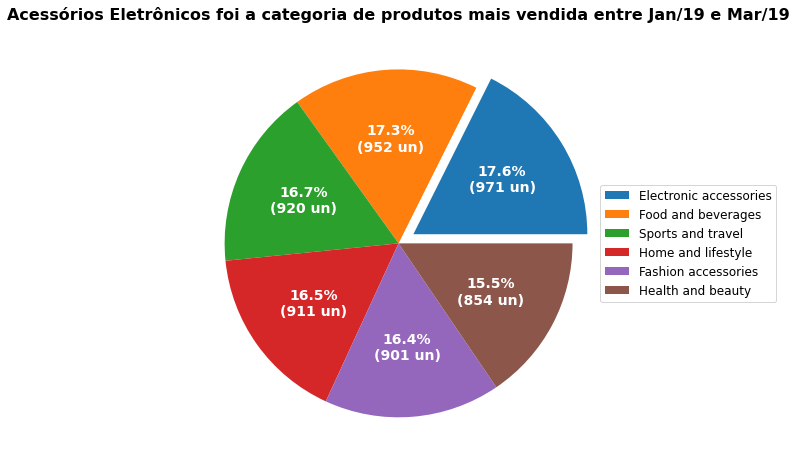

In [ ]:
#Gráfico de Pizza 
def set_label(pct, sizes):
    valor = int(pct/100.*np.sum(sizes))
    return '%.1f%%\n(%d un)'%(pct, valor)

fig, ax = plt.subplots(figsize = (8,8,))
labels = df_categorias['product_line']
sizes = df_categorias['quantity']
explode = (0.1, 0, 0, 0, 0, 0)

fatias, texts, autotexts = ax.pie(sizes, 
        explode = explode,
        autopct = lambda pct: set_label(pct, sizes),
        textprops = {'color':'w', 'weight':'bold', 'size': 14}
       )

ax.legend(fatias, labels, loc = 'center left', bbox_to_anchor = (0.95, 0, 0.5, 1), fontsize = 12)
plt.title('Acessórios Eletrônicos foi a categoria de produtos mais vendida entre Jan/19 e Mar/19', loc = 'center', weight = 'bold', size = 16)
plt.show()

# Total de vendas acumulado por semana
## Janeiro de 2019 a março de 2019

In [ ]:
#Adicionando coluna com o número da semana
df_vendas['week_number'] = df_vendas['date'].dt.week

#Adicionando coluna com o mês
df_vendas['month'] = df_vendas['date'].dt.month

#Adicionando coluna com o ano
df_vendas['year'] = df_vendas['date'].dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [ ]:
#Total de vendas por semana
df_total_vendas = df_vendas.total.groupby([df_vendas['week_number']]).agg({'sum'})
df_total_vendas = df_total_vendas.rename({'sum': 'total'}, axis = 'columns').reset_index()
df_total_vendas

,week_number,total
0,1,17543.3895
1,2,24461.1990
2,3,28693.3605
3,4,29286.8835
4,5,28360.4475
5,6,27101.8335
6,7,25563.5940
7,8,17328.6645
8,9,29219.7150
9,10,28418.8380


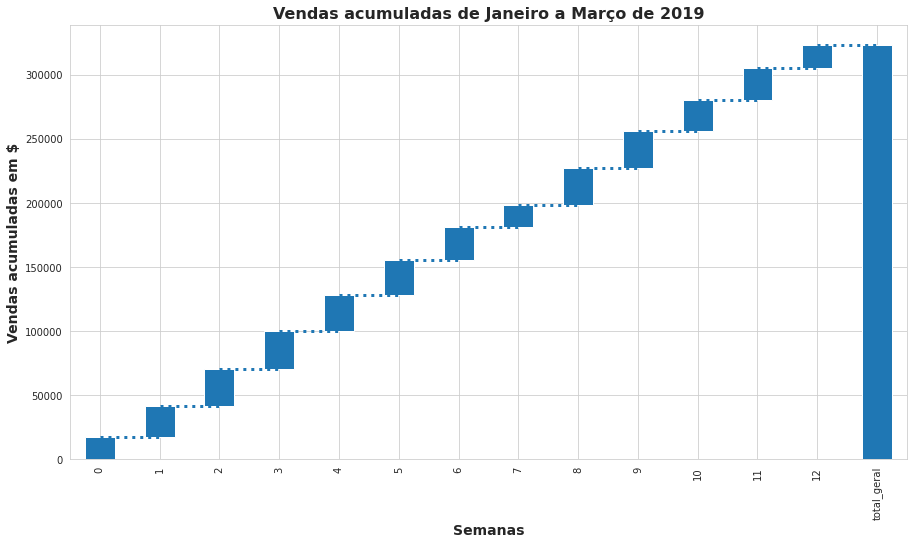

In [ ]:
#Gráfico de cascata
sns.set_style("whitegrid")

df_resultado = df_total_vendas[['total']].copy()
em_branco = df_resultado['total'].cumsum().shift(1).fillna(0)

total_geral = df_resultado.sum().total
df_resultado.loc['total_geral'] = total_geral
em_branco.loc['total_geral'] = total_geral

passo = em_branco.reset_index(drop=True).repeat(3).shift(-1)
passo[1::3] = np.nan
em_branco.loc['total_geral'] = 0

df_resultado.plot(kind = 'bar', stacked = True, bottom = em_branco,
                  legend = None,
                  figsize = (15, 8))
plt.plot(passo.index, passo.values, ls = ':', linewidth = 3)

plt.title('Vendas acumuladas de Janeiro a Março de 2019', weight = 'bold', size = 16)
plt.xlabel('Semanas', weight = 'bold', size = 14)
plt.ylabel('Vendas acumuladas em $', weight = 'bold', size = 14)

plt.show()

In [ ]:
#Renomeando index
df_resultado = df_resultado.rename({0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8',
                                    8: '9', 9: '10', 10: '11', 11: '12', 12: '13'}, axis='index')

df_resultado

,total
1,17543.3895
2,24461.1990
3,28693.3605
4,29286.8835
5,28360.4475
6,27101.8335
7,25563.5940
8,17328.6645
9,29219.7150
10,28418.8380


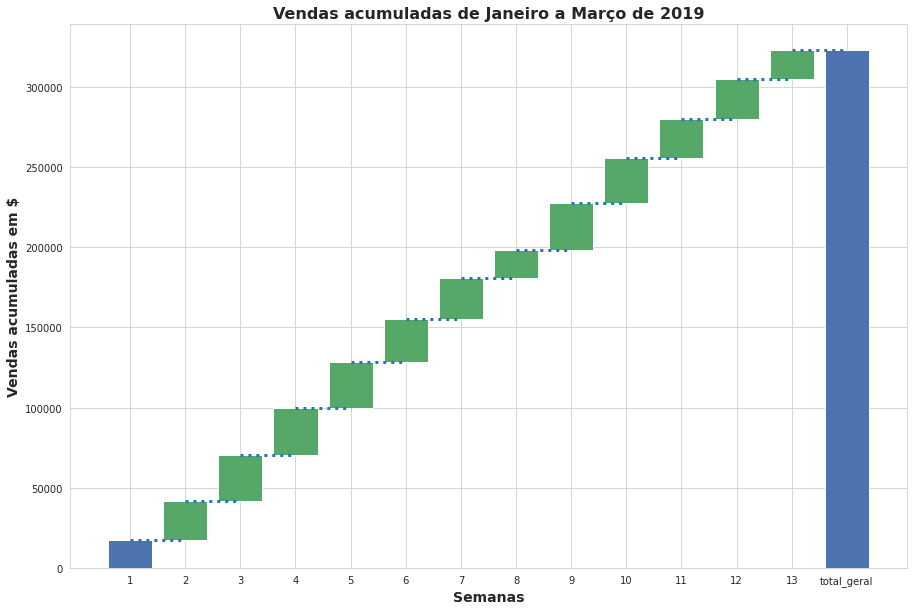

In [ ]:
#Gráfico de cascata customizado
plt.figure(figsize = (15,10))

cores = ['#4C72B0']+\
    df_resultado.total.loc['2':'13']\
        .apply(lambda total: '#55A868' if total >= 0 else '#C44E51').tolist()\
    +['#4C72B0']

plt.bar(df_resultado.index, df_resultado.total, bottom=em_branco, color=cores)
plt.plot(passo.index, passo.values, ls = ':', linewidth = 3)

plt.title('Vendas acumuladas de Janeiro a Março de 2019', weight = 'bold', size = 16)
plt.xlabel('Semanas', weight = 'bold', size = 14)
plt.ylabel('Vendas acumuladas em $', weight = 'bold', size = 14)

plt.show()

# Análise detalhada da categoria mais vendida

In [ ]:
#Porcentagem do total de quantidades vendidas das top 3 categorias
df_top_3 = df_categorias.copy().sort_values(by = 'quantity', ascending = False)[:3]
df_top_3['pct'] = df_top_3['quantity'] / df_top_3['quantity'].sum() * 100
df_top_3

,product_line,quantity,pct
0,Electronic accessories,971,34.154063
2,Food and beverages,952,33.485754
5,Sports and travel,920,32.360183


In [ ]:
#Quantidade de vendas da categoria "acessórios eletrônicos" por mês
#Separando data em colunas mês e ano
categoria = df_top_3['product_line'].values[0]
df_top_3_mes = df_vendas[df_vendas['product_line'] == categoria].quantity.groupby([df_vendas['month'],
                                                                                   df_vendas['year']])\
                                                                         .agg({'sum'}).reset_index()
df_top_3_mes = df_top_3_mes.rename({'sum': 'quantity'}, axis = 'columns')

#Junta mês e ano na mesma coluna
df_top_3_mes['date'] = df_top_3_mes['month'].map(str) + '-' + df_top_3_mes['year'].map(str)
df_top_3_mes['date'] = pd.to_datetime(df_top_3_mes['date'], format = '%m-%Y').dt.strftime('%m-%Y')

#Move coluna data para o inicio do DF
col = df_top_3_mes.pop('date')
df_top_3_mes.insert(0, col.name, col)

#Porcentagem do total de quantidades vendidas da categoria "acessórios eletrônicos" por mês
df_top_3_mes['pct'] = df_top_3_mes['quantity'] / df_top_3_mes['quantity'].sum() * 100

df_top_3_mes

,date,month,year,quantity,pct
0,01-2019,1,2019,333,34.294542
1,02-2019,2,2019,313,32.234809
2,03-2019,3,2019,325,33.470649


In [ ]:
def get_periodo (data_venda):
    if data_venda < pd.to_datetime('2019-1-11'):
        return 'De 01 a 10'
    if data_venda < pd.to_datetime('2019-1-21'):
        return 'De 11 a 20'    
    return 'Depois do dia 20'

In [ ]:
#Porcentagem do total de quantidades vendidas da categoria "acessórios eletrônicos" no mês de Janeiro
categoria = df_top_3['product_line'].values[0]
mes = df_top_3_mes.month.values[0]
ano = df_top_3_mes.year.values[0]

df_top_3_mes_periodo = df_vendas[
    (df_vendas['month'] == mes) &                                
    (df_vendas['year'] == ano) & 
    (df_vendas['product_line'] == categoria)].copy()
df_top_3_mes_periodo['periodo'] = df_top_3_mes_periodo['date'].apply(get_periodo)
df_top_3_mes_periodo = df_top_3_mes_periodo.groupby('periodo').agg({'quantity':np.sum})\
                                        .sort_values(by = 'quantity', ascending = False)

df_top_3_mes_periodo = df_top_3_mes_periodo.rename({'sum': 'quantity'}, axis = 'columns')

df_top_3_mes_periodo['pct'] = \
df_top_3_mes_periodo['quantity'] / df_top_3_mes_periodo['quantity'].sum() * 100
df_top_3_mes_periodo

,quantity,pct
periodo,,
Depois do dia 20,165,49.54955
De 11 a 20,100,30.03003
De 01 a 10,68,20.42042


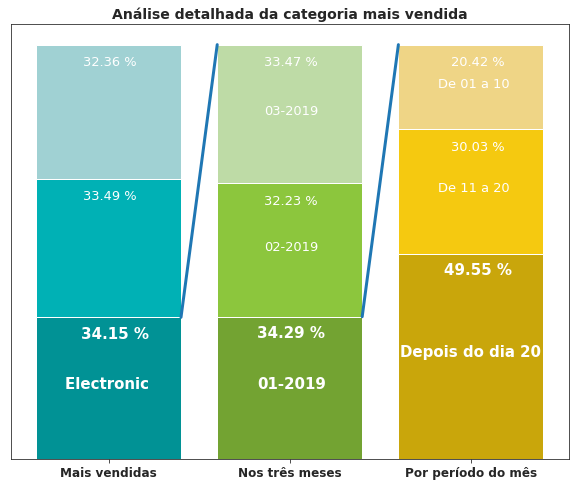

In [ ]:
#Gráfico de colunas 100% empilhadas com sub-componentes
sns.set_style("ticks")
categoria = df_top_3['product_line'].values[0]

fontdict={'size':13,'color':'w'} 
fontdict_bold={'size':15,'color':'w', 'weight':'bold'} 

cores1 = ['#019295', '#00B1B5', '#A0D1D3', ]
cores2 = ['#73A332', '#8CC63D', '#BEDBA6', ]
cores3 = ['#C9A60B', '#F5C910', '#EFD586', ]

altura = 0
fig, ax = plt.subplots(figsize=(10,8))

for i, percentual in enumerate(df_top_3['pct']):
    ax.bar([0], percentual, bottom=altura, color=[cores1[i]])
    if i==0:
        ax.text(-.15, percentual-5, '%.2f %%'%percentual, fontdict=fontdict_bold)
        ax.text(-.24, percentual/2, categoria[:11], fontdict=fontdict_bold)
    else:
        ax.text(-.14, percentual+altura-5, '%.2f %%'%percentual, fontdict=fontdict)
    altura += percentual

altura=0
for i, percentual in enumerate(df_top_3_mes['pct']):
    ax.bar([1], percentual, bottom=altura, color=[cores2[i]])
    if i==0:
        ax.text(.82, percentual-5, '%.2f %%'%percentual, fontdict=fontdict_bold)
        ax.text(.82, percentual/2, df_top_3_mes.date[i], fontdict=fontdict_bold)
    else:
        ax.text(.86, percentual+altura-5, '%.2f %%'%percentual, fontdict=fontdict)
        ax.text(.86, percentual/2+altura, df_top_3_mes.date[i], fontdict=fontdict)
    altura += percentual

altura=0
for i, percentual in enumerate(df_top_3_mes_periodo['pct']):
    ax.bar([2], percentual, bottom=altura, color=[cores3[i]])
    if i==0:
        ax.text(1.85, percentual+altura-5, '%.2f %%'%percentual, fontdict=fontdict_bold)
        ax.text(1.61, percentual/2, df_top_3_mes_periodo.index[i], fontdict=fontdict_bold)
    else:
        ax.text(1.89, percentual+altura-5, '%.2f %%'%percentual, fontdict=fontdict)
        ax.text(1.82, percentual/2+altura, df_top_3_mes_periodo.index[i], fontdict=fontdict)
    altura += percentual    

plt.plot([0.4, .6, np.nan, 1.4, 1.6],
         [df_top_3['pct'].values[0], 100, np.nan, df_top_3_mes['pct'].values[0], 100], 
         linewidth=3)
    
plt.xticks(range(3), labels = ['Mais vendidas', 'Nos três meses', 'Por período do mês'], weight = 'bold',
           size = 12)
plt.yticks([])
plt.title('Análise detalhada da categoria mais vendida', weight = 'bold', size = 14)

plt.show()